# Dimensionality Reduction

## 차원의 정의

### 차원 (Dimension)
공간 내 데이터의 위치를 나타내기 위해 필요한 축의 개수  

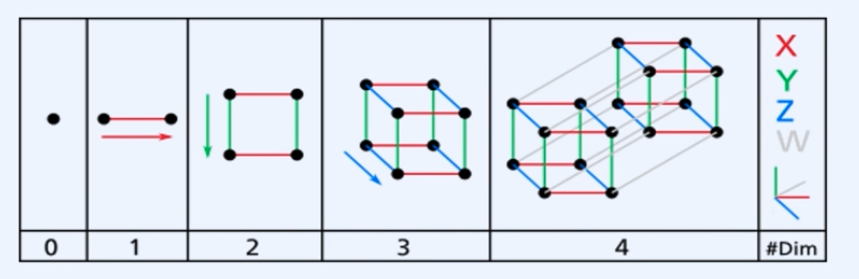

### 차원과 변수
- 데이터가 n개의 설명 변수를 가진다면 n차원의 좌표 상에서 표현할 수 있음
- 예를 들어 키, 몸무게를 설명 변수로 갖는 데이터는 다음과 같이 나타낼 수 있음  
  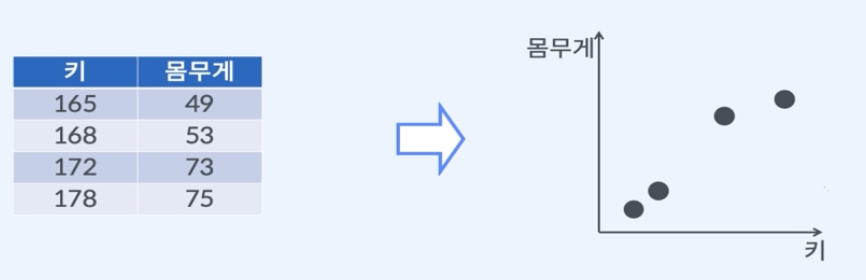

## 차원의 저주 (Curse of Dimensionality)
변수가 늘어나면서 차원이 커짐에 따라 발생하는 문제  
- 필요한 데이터 수의 지수 함수적 증가로 인한 정보의 밀도 감소  
- 공간을 설명하기 위한 데이터의 부족   
  - 과적합 문제 & 성능 감소

### 필요한 데이터 수의 지수 함수적 증가로 인한 정보의 밀도 감소  
각 변수당 가질 수 있는 값이 4개인 경우 다음과 같은 개수의 정보를 가질 수 있게 됨
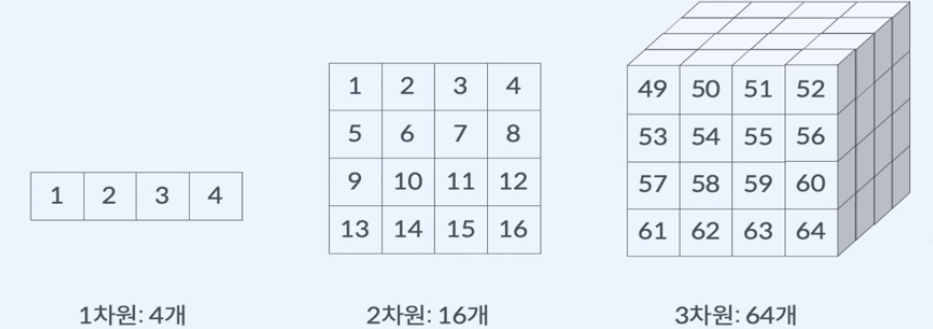  
위와 같이 증가하여 N차원인 경우 $4^n$개의 데이터를 가질 수 있게 됨  

변수가 증가할수록 공간을 설명하기 위한 데이터가 부족해지고, 모델의 성능이 감소하게 됨  
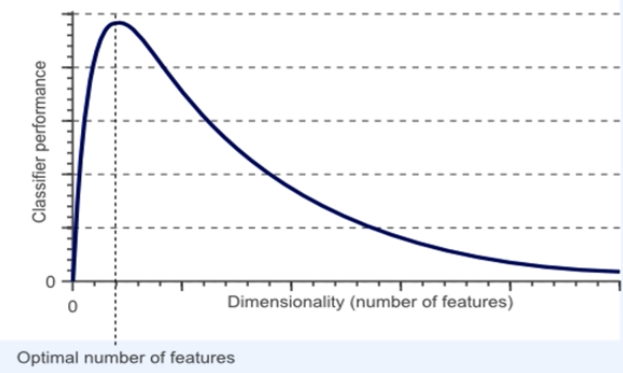

## 차원 축소 (Dimensionality Reduction)
- 데이터를 잘 설명할 수 있는 변수의 개수(Latent Space)는 현재 변수의 개수(Observation Space)보다 작을 수 있음  
- 데이터를 기반으로 잠재 공간을 파악

### 차원 축소의 효과  
1. 차원의 저주 해결
2. 연산량 감소
3. 시각화 용이

### 차원 축소 방법
1. 변수 선택 (feature selection)
  - 원본 데이터의 변수 중 불필요한 변수를 제거하는 방법  
  - e.g. 몸무게, 키 머리 길이 변수 중 상대적으로 중요하지 않은 머리 길이 변수를 제거하는 것  
    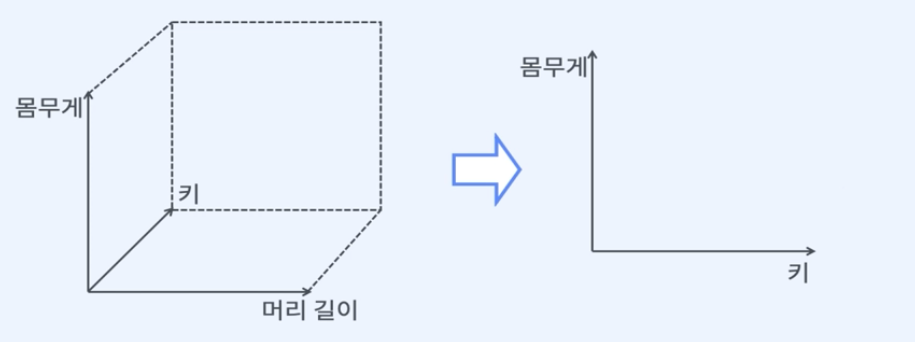
2. 변수 추출 (feature extraction)
  - 원본 데이터의 변수들을 조합해 새로운 변수를 생성하는 방법  
  - e.g. 키, 몸무게, 머리 길이 -> 체구, 머리길이
    - 체구 = 0.3 * 몸무게 + 0.7 * 키  
  - 변수 추출 방법  
    1. PCA (Principal Component Analysis)
    2. LDA (Linear Discriminant Analysis)
    3. t-SNE (t-distributed Stochastic Neighbor Embedding)

## PCA (Principal Component Analysis).
여러 변수의 정보를 담고 있는 주성분(Principal Component)이라는 새로운 변수를 생성하는 차원 축소 기법  
단순히 차원을 줄이기 보다는 관측된 차원이 아닌 실제 데이터를 설명하는 차원을 찾아서 데이터를 더 잘 이해하고자 함   


다음과 같은 그림에서 카메라가 3개인 경우 스프링 운동에 대한 데이터를 3차원으로 나타내게 됨  
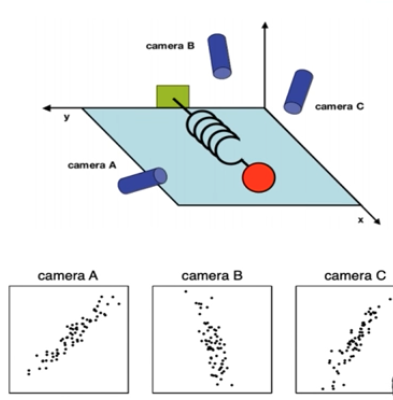  
그러나 만약 카메라가 10개라면 10차원의 데이터를 생성하게 됨  
하지만 궁극적으로 스프링의 운동은 스프링 장력이라는 변수 하나로 설명이 가능하므로 이처럼 실제 데이터를 설명하는 변수를 찾고자 하는 것이 PCA

### PCA 수식  
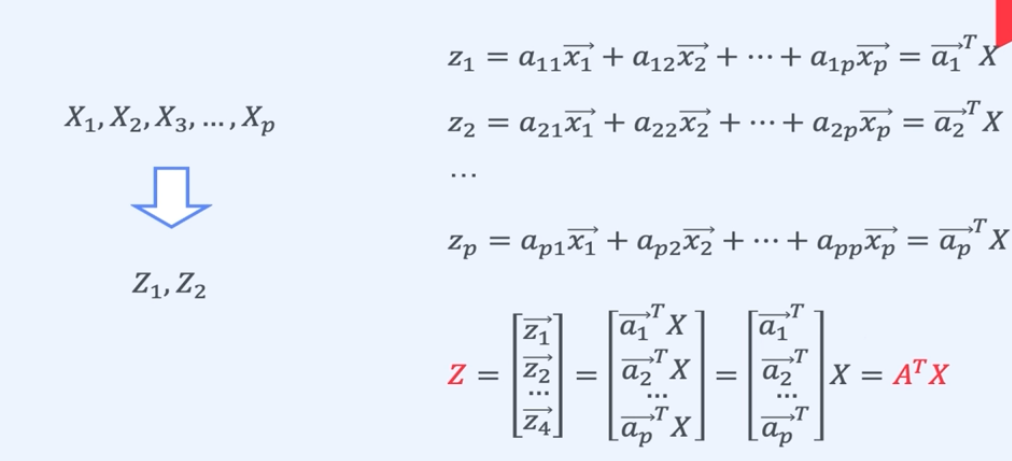

PCA를 유도하는 데는 eigen value, eigen vector 등의 계산이 필요하나, 세부 내용은 다루지 않음   
다만, 수식에서 확인할 점은 원래 변수인 X에서 Z를 유도하는 과정이 선형 결합에 의해 가능하다는 것  

### PCA 방법  
PCA를 하는 방법은 분산(Variance)을 최대로 보존하는 초평면(Hyperplane)을 선택하는 것임  
- 원본 데이터 셋과 투영된 초평면의 평균 제곱 거리를 최소화  
- 정보를 가장 적게 손실하기 때문  

<br/>

#### 분산을 최대로 하는 것이 손실을 최소화하는 이유   

$X = {(2,1), (2,4), (4,1), (4,3)}$ 데이터를  
1. $u = (1, 0)$
2. $u=({1\over\sqrt{2}},{1\over\sqrt{2}})$  

두 개의 초평면 위에 projection한 결과   

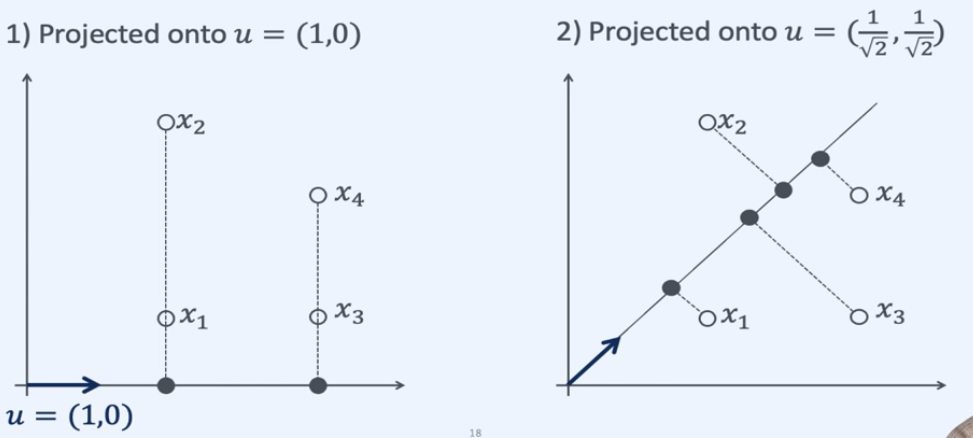

1번의 경우 데이터가 2개로 합쳐지고 분산도 작음  
2번의 경우 한 축으로 합쳐지더라도 4개의 데이터가 구별되고 분산이 큼  

따라서 차원이 줄어들더라도 분산이 크면 각각의 데이터가 구별이 가능함을 알 수 있음  

## 주성분  
주성분은 여러 개가 나올 수 있음  
1. 첫 번째 주성분
  - 분산을 가장 크게 하는 축이 첫 번째 주성분  
2. 두 번째 주성분
  - 첫 번째 주성분에 직교하면서 남은 분산을 최대로 보존하는 두번째 축이 두 번째 주성분

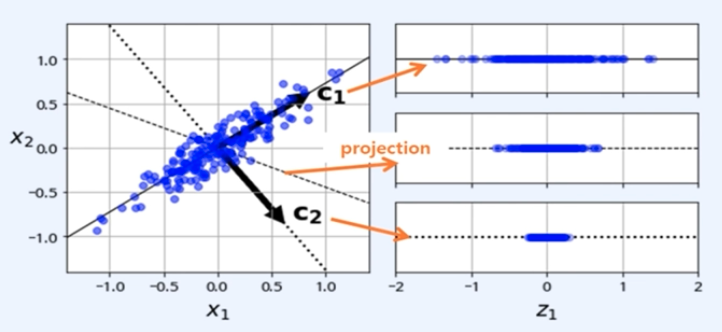

### 주성분 축을 찾는 방법  
1. 데이터 표준화
  - 데이터를 표준화하지 않으면 값의 크기에 따라 공분산이 영향을 받음  
  - 아래의 좌측 그래프는 데이터를 표준화하지 않은 결과고 우측 그래프는 데이터를 표준화한 결과인데, 표준화한 데이터가 훨씬 잘 분류되었음을 알 수 있음  
  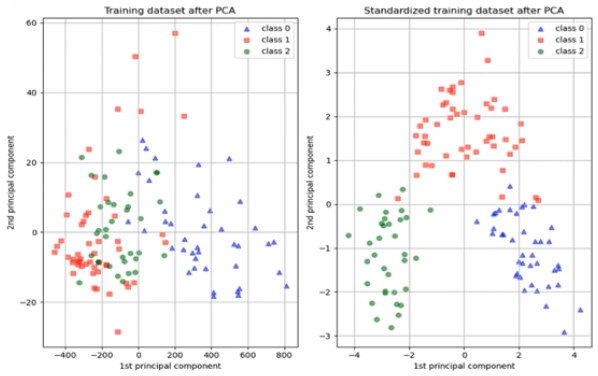

2. 공분산 행렬 생성  
  $X = {(2,1), (2,4), (4,1), (4,3)}$  
  $E(X) = {1\over4}(2+2+2+2) = 3$  
  $Var(X) = {1\over4}((-1)^2+(-1)^2+1^2+1^2) = 1$  
  $E(Y) = {1\over4}(1+4+1+3)=2.25$  
  $Var(Y) = {1\over4}((-1.25)^2+1.75^2+(-1.25)^2+0.75^2)=1.6875$  
  
  $Cov(X, Y) = E((X - E(X))(Y - E(Y))) $  
  $= {1\over4}((-1*-1.25) + (-1 * 1.75) + (1*-1.25)+(1*0.75))$  
  $= 0.25$  
  
  $Cov(Y, X) = E((Y-E(Y))(X-E(X)))$  
  $= -0.25$  

  - 최종 공분산 행렬  
  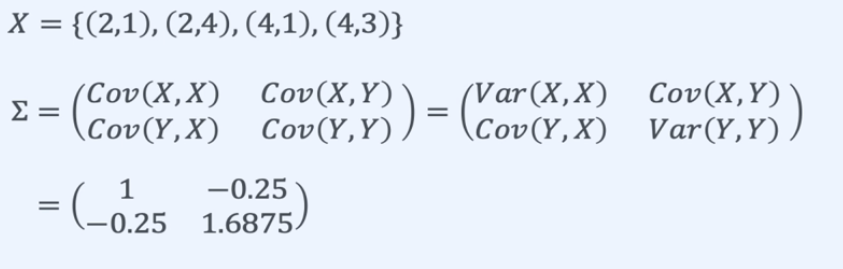

3. 고유값 분해 (Eigen Decomposition)  
  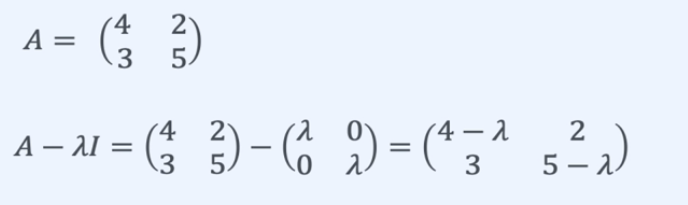

  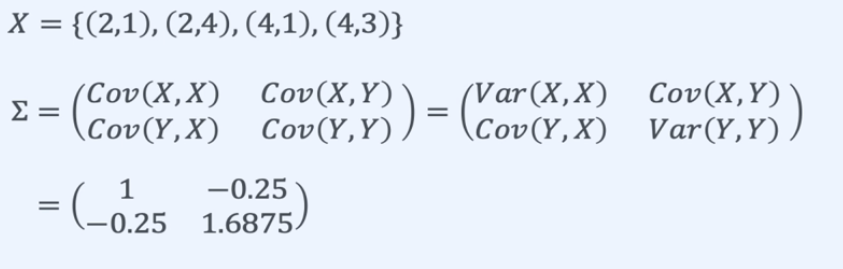
  - 각 고유값 (7, 2)에 대한 eigen vector  
    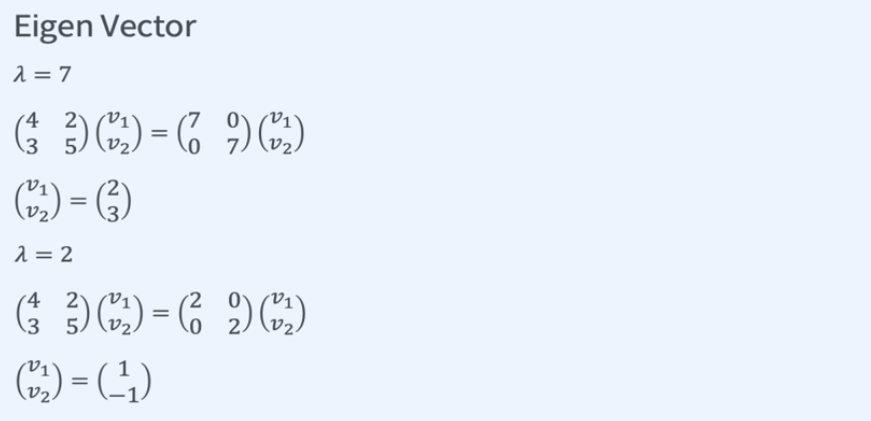

    - 고유 벡터가 새로운 축이 되며 고유 값이 클 수록 분산이 큼

4. K개 벡터의 새로운 Basis
  - K를 선택하는 방법  
    1. Scree Plot
      - 고유값이 급격히 작아지는 Elbow Point를 선택
        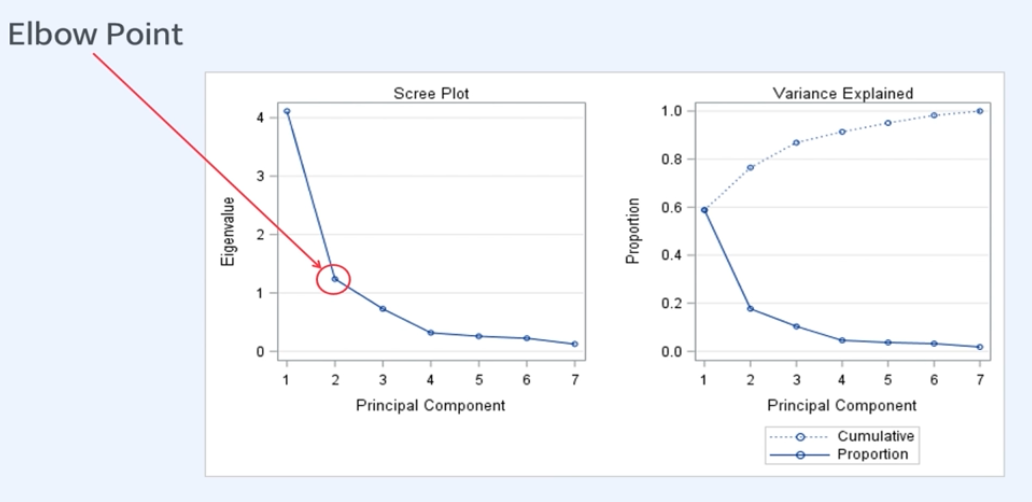
    2. Explained Variance
      - 설명된 분산을 이용  
      - 예를 들어 아래 그래프의 경우 90% 설명된 분산을 고르고 싶다면 90% 설명된 축을 고르면 되고 이 경우에는 4개의 축을 새로 계산하면 됨  
        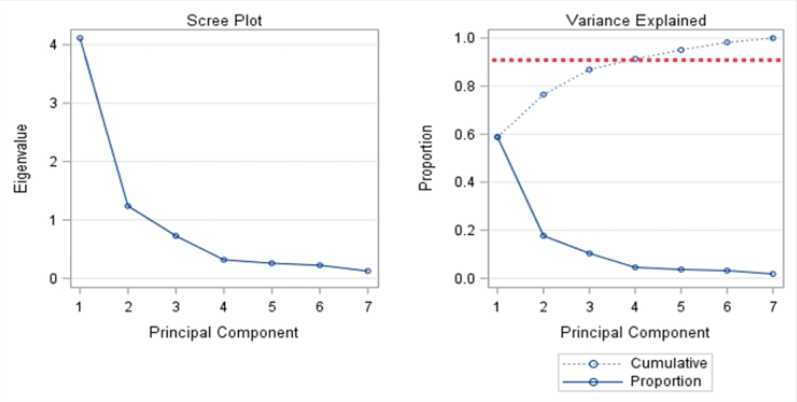

### PCA의 장단점  
1. PCA 장점  
  - 변수간 상관관계 및 연관성을 이용해 변수를 생성
  - 차원 축소로 차원의 저주를 해결 가능  
2. PCA 단점
  - 데이터에 선형성이 없다면 적용할 수 없음  
  - 데이터의 클래스를 고려하지 않기 때문에 최대 분산 방향이 특징 구분을 좋게 한다고 보장할 수 없음  
  - 주성분의 해석을 위한 도멘인 지식이 필요  
